# Classificação de imagens com openCV e tensorflow
- (RNA)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Libs

In [2]:
import cv2
import numpy as np
import os 
import zipfile 
from matplotlib import pyplot as plt 
import pandas as pd 
import seaborn as sns 
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
tf.__version__

'2.12.0'

## Extração dos dados não estruturados

In [4]:
# Extração dos pixels da imagem
path = '/content/drive/MyDrive/Computer Vision/Visão Computacional Guia Completo-20230526T132742Z-001/Visão Computacional Guia Completo/Datasets/homer_bart_1.zip'
zip_obj = zipfile.ZipFile(path, mode='r')
zip_obj.extractall('./')
zip_obj.close()

In [5]:
diretorio = '/content/homer_bart_1'

arquivos = [os.path.join(diretorio, f) for f in sorted(os.listdir(diretorio))]

In [6]:
arquivos

['/content/homer_bart_1/.DS_Store',
 '/content/homer_bart_1/bart1.bmp',
 '/content/homer_bart_1/bart10.bmp',
 '/content/homer_bart_1/bart100.bmp',
 '/content/homer_bart_1/bart101.bmp',
 '/content/homer_bart_1/bart102.bmp',
 '/content/homer_bart_1/bart103.bmp',
 '/content/homer_bart_1/bart104.bmp',
 '/content/homer_bart_1/bart105.bmp',
 '/content/homer_bart_1/bart106.bmp',
 '/content/homer_bart_1/bart108.bmp',
 '/content/homer_bart_1/bart109.bmp',
 '/content/homer_bart_1/bart11.bmp',
 '/content/homer_bart_1/bart110.bmp',
 '/content/homer_bart_1/bart111.bmp',
 '/content/homer_bart_1/bart112.bmp',
 '/content/homer_bart_1/bart113.bmp',
 '/content/homer_bart_1/bart114.bmp',
 '/content/homer_bart_1/bart115.bmp',
 '/content/homer_bart_1/bart116.bmp',
 '/content/homer_bart_1/bart117.bmp',
 '/content/homer_bart_1/bart118.bmp',
 '/content/homer_bart_1/bart119.bmp',
 '/content/homer_bart_1/bart12.bmp',
 '/content/homer_bart_1/bart120.bmp',
 '/content/homer_bart_1/bart121.bmp',
 '/content/homer_ba

## Pré-processamento

In [7]:
# tratamento de imagens 
largura = 128
altura = 128

In [8]:
# pixels da imagem
imagens = []
# classes homer e bart
classes = []

In [9]:
for imagem_caminho in arquivos:
    #print(imagem_caminho)
    try:

        imagem = cv2.imread(imagem_caminho)
        # altura e largura
        (h, w) = imagem.shape[:2]
    except:
        continue

    imagem = cv2.resize(imagem, (largura, altura))
    imagem = cv2.cvtColor(imagem , cv2.COLOR_BGR2GRAY)
    #plt.imshow(imagem)
    #plt.show()

    # converter de matriz para vetor
    imagem =  imagem.ravel()
    #print(imagem.shape)
    # add na lista de imagens
    imagens.append(imagem)
    # add classes
    nome_imagem = os.path.basename(os.path.normpath(imagem_caminho))
    #print(nome_imagem)
    if nome_imagem.startswith('b'):
        classe = 0
    else:
        classe = 1
    classes.append(classe)
    #print(classe)


In [10]:
# exemplo bart
imagens[0], classes[0]

(array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), 0)

In [11]:
# exemplo homer
imagens[200], classes[200]

(array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), 1)

## Split inicial

In [12]:
X = np.asarray(imagens)
y = np.asarray(classes)

In [13]:
X.shape

(269, 16384)

In [14]:
y.shape

(269,)

In [15]:
np.unique(y, return_counts=True)

(array([0, 1]), array([160, 109]))

## Normalização dos dados

In [16]:
scaler = MinMaxScaler()

In [17]:
scaler.fit(X)
X = scaler.transform(X)

## Divisão treino e teste

In [18]:
X.shape , y.shape

((269, 16384), (269,))

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((215, 16384), (215,), (54, 16384), (54,))

## Modelagem

    - Construção da rede neural

In [21]:
# neurônios
(16384 + 2 ) / 2

8193.0

In [22]:
network1 = tf.keras.models.Sequential()
# camadas
network1.add(tf.keras.layers.Dense(input_shape = (16384,), units=8183, activation='relu') )
# camada oculta
network1.add(tf.keras.layers.Dense(units=8193, activation='relu'))
# camada saída
network1.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [23]:
# estrurura da rede
network1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8183)              134078455 
                                                                 
 dense_1 (Dense)             (None, 8193)              67051512  
                                                                 
 dense_2 (Dense)             (None, 1)                 8194      
                                                                 
Total params: 201,138,161
Trainable params: 201,138,161
Non-trainable params: 0
_________________________________________________________________


In [24]:
# treinamento
network1.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
# histórico
historico = network1.fit(X_train, y_train, epochs=50)

Epoch 1/50
7/7 [==============================] - 6s 47ms/step - loss: 164.8284 - accuracy: 0.5209
Epoch 2/50
7/7 [==============================] - 0s 43ms/step - loss: 7.9064 - accuracy: 0.5163
Epoch 3/50
7/7 [==============================] - 0s 44ms/step - loss: 4.8407 - accuracy: 0.5442
Epoch 4/50
7/7 [==============================] - 0s 43ms/step - loss: 3.2888 - accuracy: 0.5628
Epoch 5/50
7/7 [==============================] - 0s 43ms/step - loss: 1.8224 - accuracy: 0.4977
Epoch 6/50
7/7 [==============================] - 0s 43ms/step - loss: 0.8694 - accuracy: 0.5070
Epoch 7/50
7/7 [==============================] - 0s 43ms/step - loss: 0.6937 - accuracy: 0.5116
Epoch 8/50
7/7 [==============================] - 0s 44ms/step - loss: 0.6812 - accuracy: 0.6140
Epoch 9/50
7/7 [==============================] - 0s 44ms/step - loss: 0.6626 - accuracy: 0.6419
Epoch 10/50
7/7 [==============================] - 0s 45ms/step - loss: 0.6334 - accuracy: 0.6419
Epoch 11/50
7/7 [==========

## Avaliação

In [26]:
historico.history.keys()

dict_keys(['loss', 'accuracy'])

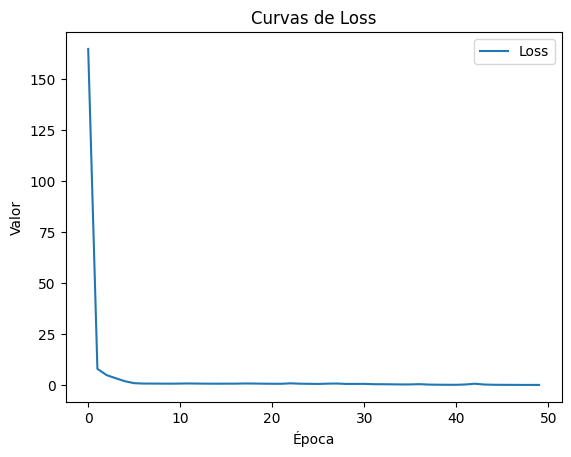

In [31]:
plt.plot(historico.history['loss'], label='Loss')
plt.xlabel('Época')
plt.ylabel('Valor')
plt.title('Curvas de Loss')
plt.legend()
plt.show()

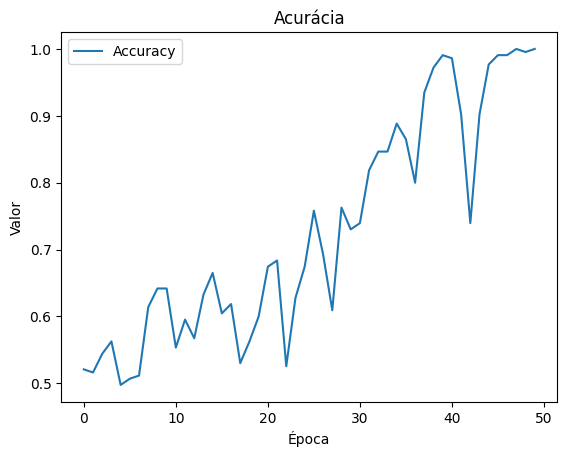

In [30]:
plt.plot(historico.history['accuracy'], label='Accuracy')
plt.xlabel('Época')
plt.ylabel('Valor')
plt.title('Acurácia')
plt.legend()
plt.show()

## Salvar e carregar a rede neural 

## Prever nova imagem